### Plotting alignment data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
import math
import pandas as pd
import utils.db_utils as db
import utils.plot_utils as plot
import utils.file_utils as file
import config

############################################
# get configuration
cfg = config.getConfig() # configure values in config.js
############################################

targetLang = cfg['targetLang']
bibleType = cfg['targetBibleType']
tWordsTypeList = cfg['tWordsTypeList']
dbPath = cfg['dbPath']
trainingDataPath = cfg['trainingDataPath']
testamentStr = cfg['testamentStr']
baseDataPath = cfg['baseDataPath']

In [2]:
# get alignments for tW keyterms

minAlignments = 20
remove = ['ὁ', 'τὸ', 'τὰ', 'αὐτός', 'λέγω', 'ὡς', 'μέν', 'εἷς']

alignmentsForWord, filteredAlignmentsForWord = db.fetchAlignmentDataForAllTWordsCached(trainingDataPath, bibleType, tWordsTypeList, minAlignments, remove)
print(f"Original Language Alignments: {len(filteredAlignmentsForWord)}")

Using cached Alignments
Unfiltered Alignments: 4368
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω in remove list
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting λέγω alignments
getFilteredAlignmentsForWord - rejecting ὁ alignments
getFilteredAlignmentsForWord - rejecting ὁ alignments
getFilteredAlignmentsForWord - rejecting ὁ alignments
getFilteredAlignmentsForWord - rejecting ὁ alignments
getFilteredAlignmentsForWord - rejecting ὁ alignments
getFilteredAlignmentsForWord - rejecting ὁ in r

### Analysis of alignments for tWords in the en_ult:

#### Frequency of alignments:
_***Note that each line on the graphs below represents an alignment for a specific word. For example we have separate lines for 'Θεός', 'Θεὸς', or 'Θεοῦ' even though they have the same lemma.  It made sense to group the alignments this way since aligners are likely to choose different target language words based on morphology of the word._

Plotting of 429 tWord Alignments


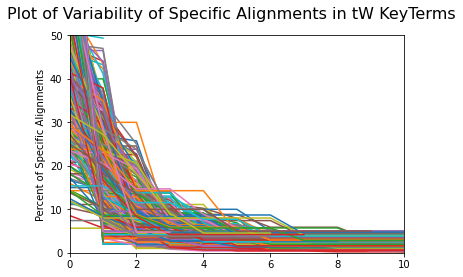

In [3]:
frequenciesOfAlignments, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, 'alignmentText')

print(f"Plotting of {len(filteredAlignmentsForWord)} tWord Alignments")
title = f"Plot of Variability of Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlimit = [0, 10]
outputTable = plot.plotFrequencies(frequenciesOfAlignments, title, ylabel, showXValues=False, xlimit=xlimit)

In [4]:
print(f"Testing all tWords")

alignmentOrigWordsThreshold = 3
alignmentTargetWordsThreshold = 5
origWordsBetweenThreshold = 1
targetWordsBetweenThreshold = 1
alignmentFrequencyMinThreshold = 5

type_ = 'all_twords'

warningPath = f'{baseDataPath}/{type_}_{bibleType}_{testamentStr}_warnings.json'
warningData = db.generateWarnings(warningPath, type_, bibleType, filteredAlignmentsForWord, alignmentOrigWordsThreshold,
                                  alignmentTargetWordsThreshold, origWordsBetweenThreshold,
                                  targetWordsBetweenThreshold, alignmentFrequencyMinThreshold,
                                  tag=f'{minAlignments}')

print(f"Found {len(warningData)} alignments to check - min threshold {minAlignments}")

frequencyWarnings = warningData[warningData['frequencyWarning'].str.len() > 0]
print (f"\nFound {len(frequencyWarnings)} frequencyWarnings")
frequencyWarningsByOrigWords = frequencyWarnings['originalWord'].value_counts()
print (f"FrequencyWarnings by original word:")
frequencyWarningsByOrigWords

Testing all tWords
Found 1436 alignments to check - min threshold 20

Found 1201 frequencyWarnings
FrequencyWarnings by original word:


ἐγένετο     65
Θεοῦ        50
λόγον       37
Ἰησοῦς      37
Χριστοῦ     33
            ..
Ἅγιον        1
ἀδελφοί      1
Σίμων        1
ἀμὴν         1
δαιμόνια     1
Name: originalWord, Length: 168, dtype: int64

In [5]:
frequencyWarningsByLemma = frequencyWarnings['lemma'].value_counts()
print (f"FrequencyWarnings by lemma:")
frequencyWarningsByLemma

FrequencyWarnings by lemma:


θεός          104
Ἰησοῦς         77
γίνομαι        65
λόγος          53
ὁράω           50
             ... 
ἔρημος          1
Ἱεροσόλυμα      1
Σίμων           1
θρόνος          1
βασιλεία        1
Name: lemma, Length: 97, dtype: int64

Found 29 original words with frequency warnings
Plotting of 29 tWord Alignments


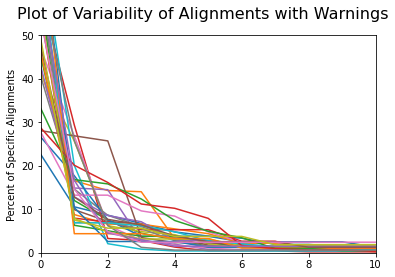

In [6]:
minNumberOfWarnings = 10
origWordsWithWarnings = []
for key in frequencyWarningsByOrigWords.keys():
    count = frequencyWarningsByOrigWords[key]
    if count > minNumberOfWarnings:
        origWordsWithWarnings.append(key)

warningsAlignments = {}
for word in origWordsWithWarnings:
    warningsAlignments[word] = filteredAlignmentsForWord[word]
print(f"Found {len(origWordsWithWarnings)} original words with frequency warnings")

frequenciesOfAlignments, stats = db.getFrequenciesOfFieldInAlignments(warningsAlignments, 'alignmentText')

print(f"Plotting of {len(warningsAlignments)} tWord Alignments")
title = f"Plot of Variability of Alignments with Warnings"
ylabel = "Percent of Specific Alignments"
xlimit = [0, 10]
outputTable = plot.plotFrequencies(frequenciesOfAlignments, title, ylabel, showXValues=False, xlimit=xlimit)

### Analysis:

#### Analysis of numerical metrics:

#### Analysis of original language word count:

Found 429 original language words for tW type all


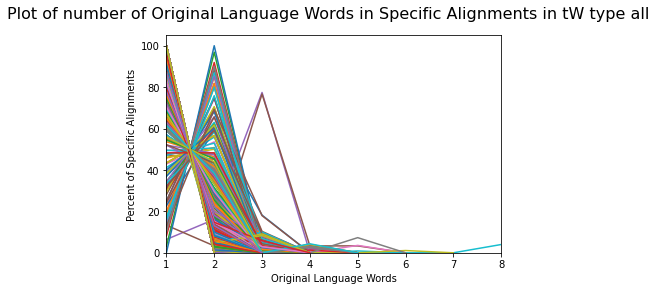

In [7]:
type_ = 'all'
field = 'origWordsCount'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

print(f"Found {len(field_frequencies)} original language words for tW type {type_}")
title = f"Plot of number of Original Language Words in Specific Alignments in tW type {type_}"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[1, 8])


##### Notes:
- this field analysis suggests that original word counts are tight - a threshold word count of 3 probably good for English to flag for review.
<p></p>

Out of 429, found 5 original language words that have instances with over 4 words


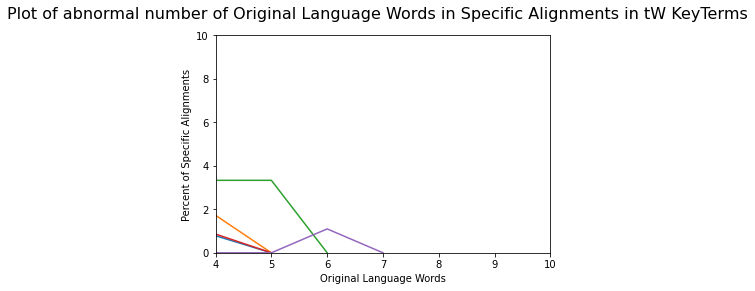

In [8]:
threshold = 4
abnormalAlignments = {}
for origWord in field_frequencies:
    frequency = field_frequencies[origWord]
    count = len(frequency)
    if count >= threshold:
        abnormalAlignments[origWord] = frequency

print(f"Out of {len(field_frequencies)}, found {len(abnormalAlignments)} original language words that have instances with over {threshold} words")
filledFrequencies = db.zeroFillFrequencies(abnormalAlignments)

title = f"Plot of abnormal number of Original Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[threshold, 10], ylimit=[0, 10])

#### Analysis of target language word count:

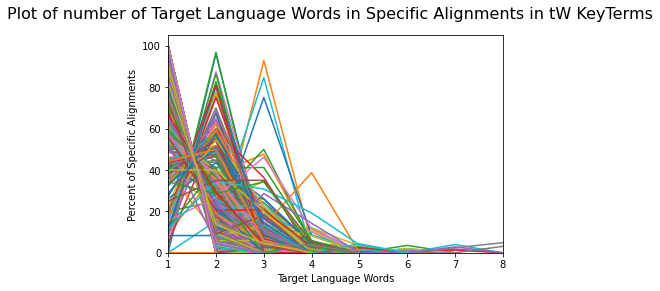

In [9]:
field = 'targetWordsCount'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Target Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Target Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[1, 8])

##### Notes:
- this field analysis suggests that a threshold word count of 3 probably good for English to flag for review.
<p></p>

#### Analysis of count of extra unaligned words between aligned original language words:

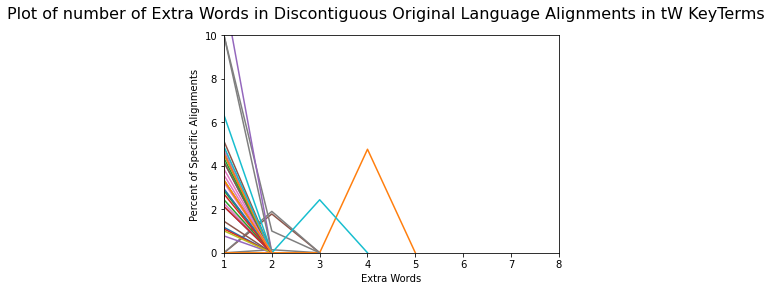

In [10]:
field = 'origWordsBetween'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Extra Words in Discontiguous Original Language Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Extra Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[1, 8], ylimit=[0,10])

##### Notes:
- this field analysis suggests that most original language alignments probably good. Probably the cases of a word between aligned words should be reviewed.
<p></p>

#### Analysis of count of extra unaligned words between aligned target language words:

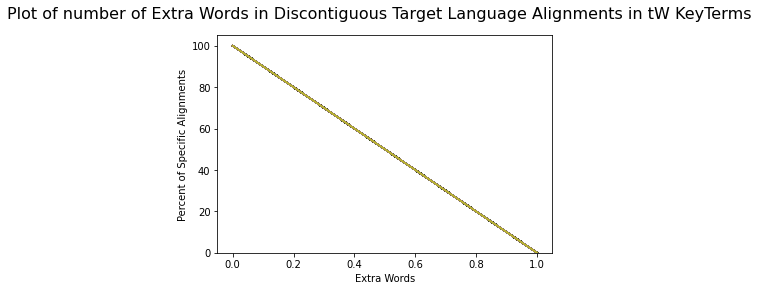

In [11]:
field = 'targetWordsBetween'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Extra Words in Discontiguous Target Language Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Extra Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that most target language alignments are very tight.

#### Generate CSV of questionable alignments


In [12]:
basePath = f'./data/{type_}_{bibleType}_NT_summary'
summary = db.getStatsForAlignments(filteredAlignmentsForWord)
df = pd.DataFrame(summary)
csvPath = basePath + '.csv'
summary_ = db.saveDictOfDictToCSV(csvPath, df)
print(f"saved summary of {len(summary)} original words to {csvPath}")
summary_

saved summary of 429 original words to ./data/all_en_ult_NT_summary.csv


,id,orginalWord,lemma,strong,alignmentsForOriginalWord,alignmentFrequency%,alignmentFreq,alignmentFreq-min,alignmentFreq-max,alignmentFreq-mean,...,targetWordsCount-total,targetWordsCount-meanNormalized,targetWordsCount-stddevNormalized,targetWordsBetween-min,targetWordsBetween-max,targetWordsBetween-mean,targetWordsBetween-stddev,targetWordsBetween-total,targetWordsBetween-meanNormalized,targetWordsBetween-stddevNormalized
0,ἀμὴν,ἀμὴν,ἀμήν,G02810,99,"{'ἀμὴν = Truly': 65.65656565656566, 'ἀμὴν = tr...","[65, 33, 1]",1,65,33.000000,...,99,0.010101,0.000000,0,0,0.0,0.0,0,0,0
1,ἄγγελος,ἄγγελος,ἄγγελος,G00320,46,"{'ἄγγελος = angel': 63.04347826086957, 'ἄγγελο...","[29, 15, 1, 1]",1,29,11.500000,...,63,0.021739,0.007662,0,0,0.0,0.0,0,0,0
2,ἐποίησεν,ἐποίησεν,ποιέω,G41600,76,"{'ἐποίησεν = did': 14.473684210526317, 'ἐποίησ...","[11, 8, 8, 6, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,...",1,11,2.000000,...,133,0.013158,0.005472,0,0,0.0,0.0,0,0,0
3,ποιῆσαι,ποιῆσαι,ποιέω,G41600,49,"{'ποιῆσαι = to do': 28.57142857142857, 'ποιῆσα...","[14, 6, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1,14,2.041667,...,96,0.020408,0.007278,0,0,0.0,0.0,0,0,0
4,ἐξουσίαν,ἐξουσίαν,ἐξουσία,G18490,57,"{'ἐξουσίαν = authority': 54.385964912280706, '...","[31, 8, 6, 3, 2, 1, 1, 1, 1, 1, 1, 1]",1,31,4.750000,...,77,0.017544,0.009879,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,ὕδωρ,ὕδωρ,ὕδωρ,G52040,23,"{'ὕδωρ = water': 82.6086956521739, 'τὸ ὕδωρ = ...","[19, 3, 1]",1,19,7.666667,...,24,0.043478,0.008497,0,0,0.0,0.0,0,0,0
425,ἔγραψα,ἔγραψα,γράφω,G11250,20,"{'ἔγραψα = I have written': 25.0, 'ἔγραψα = I ...","[5, 4, 2, 2, 2, 1, 1, 1, 1, 1]",1,5,2.000000,...,44,0.050000,0.019813,0,0,0.0,0.0,0,0,0
426,μῆνας,μῆνας,μήν,G33760,21,"{'μῆνας = months': 61.904761904761905, 'μῆνας ...","[13, 6, 1, 1]",1,13,5.250000,...,21,0.047619,0.000000,0,0,0.0,0.0,0,0,0
427,πρῶτος,πρῶτος,πρῶτος,G44130,26,"{'πρῶτος = first': 73.07692307692307, 'πρῶτος ...","[19, 2, 1, 1, 1, 1, 1]",1,19,3.714286,...,35,0.038462,0.020879,0,0,0.0,0.0,0,0,0
